# Train a regression ConvNN model using BOHB tuner

In [1]:
import sys  
sys.path.insert(0, '../telescopeML/')

# from predict_observational_dataset_v3 import ProcessObservationalDataset, ObsParameterPredictor
from DeepRegTrainer import TrainRegression
# from bohb_optimizer_2 import *
from StatVisAnalyzer import *

# from functions import plot_predicted_vs_observed, boxplot_hist, plot_spectra_errorbar, plot_predicted_vs_spectra_errorbar
# from functions import filter_dataframe, interpolate_df, find_nearest_top_bottom, filter_dataset_range, regression_report, print_results_fun


2023-07-13 14:20:02.141853: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading BokehJS ...

In [2]:
# # Libraries for BOHB Package 
# import logging
# logging.basicConfig(level=logging.WARNING)

# import argparse

# import hpbandster.core.nameserver as hpns
# import hpbandster.core.result as hpres

# from hpbandster.optimizers import BOHB as BOHB
# from hpbandster.examples.commons import MyWorker

# from tensorflow.keras.models import load_model
# import ConfigSpace as CS
# from hpbandster.core.worker import Worker

# Step 1: Load the dataset

In [2]:
# original dataset
df=pd.read_csv('../../datasets/browndwarf_R100_v4_newWL_v2.csv.bz2', compression='bz2')
df.head(3)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


In [3]:
wl = pd.read_csv('../../datasets/wl.csv')
wl.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


In [4]:
df.iloc[::10]

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.00,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
10,5.00,1100,0.25,1.7,8.540979e-09,9.610928e-09,8.362026e-09,6.331807e-09,5.411898e-09,3.597492e-09,...,2.589948e-09,1.400508e-09,1.423739e-09,1.331622e-09,5.718932e-10,2.525684e-09,2.577776e-09,2.171606e-09,1.170498e-09,no
20,5.00,1100,0.50,1.0,2.089233e-08,2.547443e-08,2.398659e-08,1.954245e-08,1.673706e-08,1.128757e-08,...,1.030422e-08,6.744711e-09,6.570654e-09,5.994584e-09,3.266539e-09,6.722988e-09,6.756289e-09,5.708415e-09,3.422240e-09,no
30,5.00,1100,1.00,0.5,3.773544e-08,4.306029e-08,3.789344e-08,2.982717e-08,2.555826e-08,1.704151e-08,...,3.370933e-08,2.475817e-08,2.292027e-08,2.084380e-08,1.293259e-08,1.818421e-08,1.723477e-08,1.401317e-08,8.880054e-09,no
40,5.00,1100,1.50,0.0,7.403044e-08,8.240733e-08,7.323895e-08,5.885655e-08,5.086389e-08,3.452053e-08,...,1.067845e-07,8.506743e-08,7.629151e-08,6.833675e-08,4.665959e-08,5.297000e-08,4.829532e-08,3.887601e-08,2.587082e-08,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30840,3.25,1000,1.00,-1.0,6.179704e-08,6.023661e-08,4.317990e-08,3.128656e-08,2.771920e-08,1.748527e-08,...,6.074206e-08,4.763676e-08,4.974581e-08,4.320090e-08,2.942153e-08,4.588604e-08,4.660016e-08,3.899730e-08,2.401752e-08,no
30850,3.25,1000,1.00,1.7,4.587650e-09,3.838308e-09,2.586146e-09,1.860407e-09,1.635306e-09,1.152218e-09,...,1.364340e-09,8.768095e-10,8.903187e-10,7.791423e-10,4.586279e-10,1.281345e-09,9.366753e-10,5.737637e-10,3.020979e-10,no
30860,3.25,1000,1.50,1.0,9.151923e-09,7.599074e-09,4.870096e-09,3.395405e-09,2.993091e-09,2.001870e-09,...,8.316857e-09,5.922216e-09,5.734787e-09,5.036230e-09,3.292385e-09,4.859911e-09,3.820969e-09,2.376922e-09,1.196810e-09,no
30870,3.25,1000,2.00,0.5,1.755109e-08,1.456820e-08,9.125922e-09,6.253583e-09,5.540055e-09,3.570220e-09,...,3.041929e-08,2.417082e-08,2.437794e-08,2.183006e-08,1.552078e-08,1.638151e-08,1.205167e-08,7.349473e-09,3.697040e-09,no


## Prepare feature variables (X) and targets (y)

In [19]:
df = df[df['is_augmented'].isin(['no'])]
X = df.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)

y = df[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


In [20]:
y['temperature'] = np.log10(y['temperature'])

/tmp/ipykernel_57344/3354840019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['temperature'] = np.log10(y['temperature'])


In [8]:
# print( 'skewness:' )
# display(set( zip(['gravity', 'c_o_ratio', 'metallicity', 'temperature'],(stats.skew(y[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]])))))
# y.hist(grid=True, bins=19);

In [13]:
y.head(100)

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393
...,...,...,...,...
95,5.5,0.50,2.0,3.113943
96,5.5,1.00,-1.0,3.113943
97,5.5,1.00,-0.7,3.113943
98,5.5,1.00,-0.5,3.113943


---

# Step 2: Data Processing

In [10]:
# Create an instance of TrainCNNRegression
train_cnn_regression = TrainRegression(feature_values=X,
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             n_jobs=4,
                             cv=5,
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN')

In [11]:
# Split the dataset into train and test sets
train_cnn_regression.split_train_validation_test(test_size=0.1, val_size=0.1)

In [12]:
# normalize the X features using MinMax Scaler
train_cnn_regression.standardize_X_row_wise()

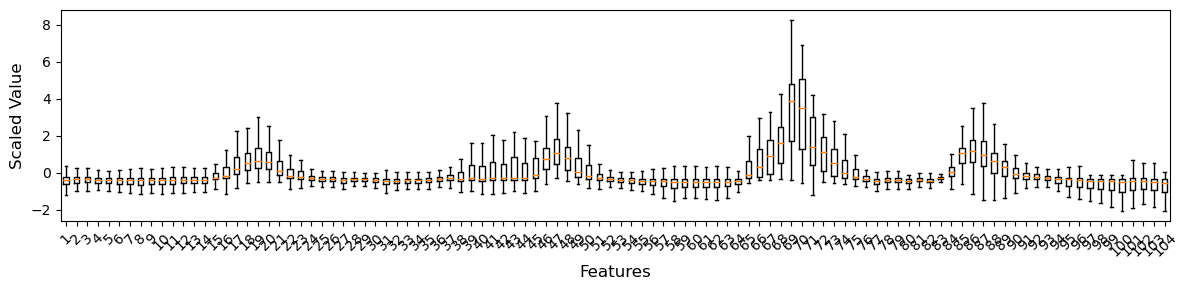

In [13]:
train_cnn_regression.plot_boxplot_scaled_features(train_cnn_regression.X_train_standardized_rowwise, xticks_list = None)

In [14]:
# Standardize the y features using Standard Scaler
train_cnn_regression.standardize_y_column_wise()

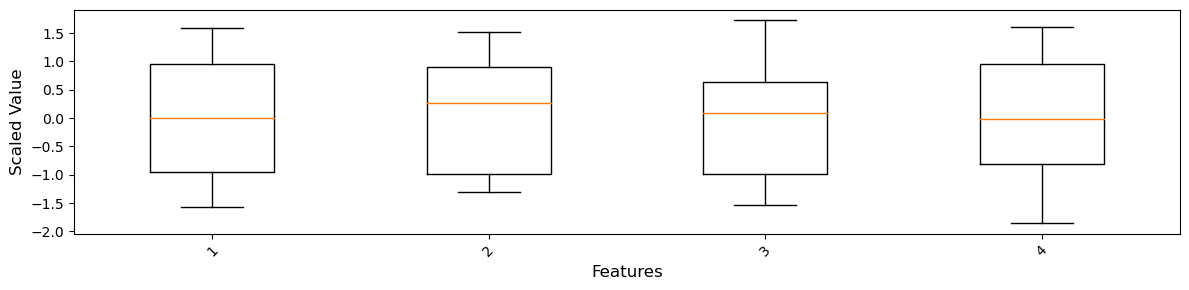

In [15]:
train_cnn_regression.plot_boxplot_scaled_features(train_cnn_regression.y_train_standardized_columnwise)

In [16]:
# train_cnn_regression.y_train_standardized_columnwise

In [17]:
train_cnn_regression.X_train_min = train_cnn_regression.X_train.min(axis=1)
train_cnn_regression.X_train_max = train_cnn_regression.X_train.max(axis=1)

In [18]:
train_cnn_regression.X_val_min = train_cnn_regression.X_val.min(axis=1)
train_cnn_regression.X_val_max = train_cnn_regression.X_val.max(axis=1)

In [19]:
train_cnn_regression.X_test_min = train_cnn_regression.X_test.min(axis=1)
train_cnn_regression.X_test_max = train_cnn_regression.X_test.max(axis=1)

In [20]:
df_MinMax_train = pd.DataFrame((train_cnn_regression.X_train_min, train_cnn_regression.X_train_max)).T
df_MinMax_val = pd.DataFrame((train_cnn_regression.X_val_min, train_cnn_regression.X_val_max)).T
df_MinMax_test = pd.DataFrame((train_cnn_regression.X_test_min, train_cnn_regression.X_test_max)).T

In [21]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [22]:
df_MinMax_train.head()

,min,max
28744,8.265340e-12,3.445259e-08
6288,8.080712e-22,8.397132e-14
13749,2.734403e-07,8.632182e-06
11713,4.414951e-16,3.373262e-10
15538,3.722576e-07,6.859888e-06


In [23]:
# plt.loglog(train_cnn_regression.X_train_max, 'k.', alpha = 0.4)
# plt.loglog(train_cnn_regression.X_train, 'r.', label='X_train', alpha = 0.4)
# plt.loglog(train_cnn_regression.X_train_min, 'r.', alpha = 0.4)

---

In [24]:
train_cnn_regression.standardize_X_column_wise(
                                                X_train = df_MinMax_train.values,
                                                X_val   = df_MinMax_val.values,
                                                X_test  = df_MinMax_test.values,
                                                )

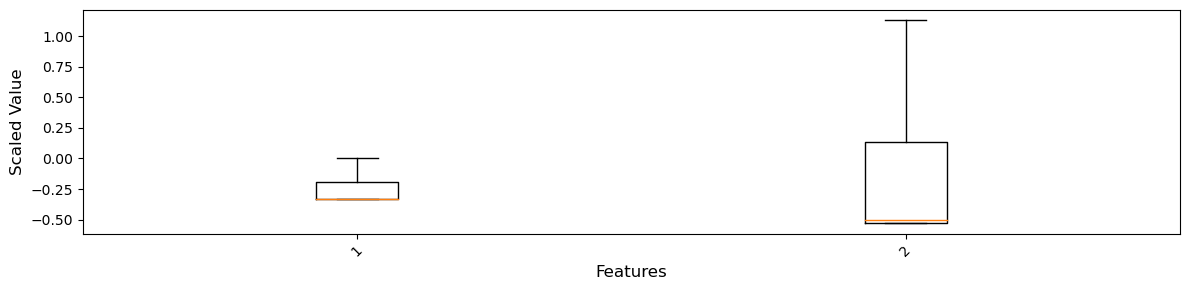

In [25]:
train_cnn_regression.plot_boxplot_scaled_features(train_cnn_regression.X_test_standardized_columnwise)

# Step 3: Train CNN model

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the model architecture
input_1 = tf.keras.layers.Input(shape=(104, 1))
input_2 = tf.keras.layers.Input(shape=(2,))

model  = Conv1D(32, 3, 
                 kernel_initializer = 'he_normal', 
                 activation='relu', 
                 input_shape=(104, 1))(input_1)

model  = Conv1D(64, 3, 
                kernel_initializer = 'he_normal', 
                activation='relu')(model)

model  = Conv1D(128, 3, 
                kernel_initializer = 'he_normal', 
                activation='relu')(model)

model  = MaxPooling1D(2)(model)

model  = Conv1D(256, 3, 
                kernel_initializer = 'he_normal', 
                activation='relu')(model)

model  = Conv1D(512, 3, 
                kernel_initializer = 'he_normal', 
                activation='relu')(model)


model  = MaxPooling1D(2)(model)
model  = Flatten()(model)

model = tf.keras.layers.concatenate([model, input_2], 
                                                 name = 'Concatenated_Layer')


model  = Dense(128,                      
                kernel_initializer = 'he_normal',
                activation='relu')(model)

model  = Dense(512,                      
                kernel_initializer = 'he_normal',
                activation='relu')(model)

out__gravity =  Dense(1, 
                      activation='linear',
                name='gravity')(model)  # No activation function for regression

out__c_o_ratio = Dense(1, 
                      activation='linear',
                      name='c_o_ratio')(model)  # No activation function for regression

out__metallicity = Dense(1, 
                        activation='linear',
                        name='metallicity')(model)  # No activation function for regression

out__temperature = Dense(1, 
                        activation='linear',
                        name='temperature')(model)  # No activation function for regression

model = tf.keras.Model(inputs=[input_1, input_2], 
                               outputs=[out__gravity, out__c_o_ratio, out__metallicity, out__temperature])


# Compile the model with an optimizer, loss function, and metrics
model.compile(loss='huber_loss', 
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),  
              metrics=['mae'])

# Train the model
history = model.fit(x = [train_cnn_regression.X_train_standardized_rowwise, 
                         train_cnn_regression.X_train_standardized_columnwise], 
          y = [train_cnn_regression.y_train_standardized_columnwise[:,0], 
               train_cnn_regression.y_train_standardized_columnwise[:,1],
               train_cnn_regression.y_train_standardized_columnwise[:,2],
               train_cnn_regression.y_train_standardized_columnwise[:,3]], 
          batch_size=32, 
          epochs=1, 
          validation_data=([train_cnn_regression.X_val_standardized_rowwise, 
                            train_cnn_regression.X_val_standardized_columnwise], 
                          [train_cnn_regression.y_val_standardized_columnwise[:,0], 
                           train_cnn_regression.y_val_standardized_columnwise[:,1],
                           train_cnn_regression.y_val_standardized_columnwise[:,2],
                           train_cnn_regression.y_val_standardized_columnwise[:,3]]))

2023-07-13 12:15:39.833710: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 12:15:39.838764: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


782/782 [==============================] - 441s 559ms/step - loss: 0.3250 - gravity_loss: 0.1168 - c_o_ratio_loss: 0.0748 - metallicity_loss: 0.1104 - temperature_loss: 0.0230 - gravity_mae: 0.3618 - c_o_ratio_mae: 0.2842 - metallicity_mae: 0.3652 - temperature_mae: 0.1399 - val_loss: 0.1431 - val_gravity_loss: 0.0390 - val_c_o_ratio_loss: 0.0254 - val_metallicity_loss: 0.0716 - val_temperature_loss: 0.0071 - val_gravity_mae: 0.2083 - val_c_o_ratio_mae: 0.1773 - val_metallicity_mae: 0.2975 - val_temperature_mae: 0.0901


In [29]:
train_cnn_regression.trained_model = model

## Save Trained Model

In [30]:
train_cnn_regression.trained_model.save('../../outputs/trained_models/trained_CNN_architecture_v1.h5')
train_cnn_regression.trained_model.save_weights('../../outputs/trained_models/trained_CNN_weights_v1.h5')

with open('../../outputs/trained_models/trained_CNN_history_v1.pkl', 'wb') as file:
    pk.dump(history, file)
    


INFO:tensorflow:Assets written to: ram://880a639e-2355-435d-95b7-b1ead35e4c97/assets


INFO:tensorflow:Assets written to: ram://880a639e-2355-435d-95b7-b1ead35e4c97/assets


## Load Saved Models

In [27]:
# model = load_model('../../outputs/regression/trained_models/my_model_architecture__xStand_yStand_MinMax_v2.h5')
# model.load_weights('../../outputs/regression/trained_models/my_model_weights__xStand_yStand_MinMax_v2.h5')

# # Loading the saved history object
# with open('../../outputs/regression/trained_models/training_history__xStand_yStand_MinMax_v2.pkl', 'rb') as file:
#     history = pk.load(file)    

In [31]:
model = load_model('../../outputs/trained_models/trained_CNN_architecture_v1.h5')
model.load_weights('../../outputs/trained_models/trained_CNN_weights_v1.h5')

# Loading the saved history object
with open('../../outputs/trained_models/trained_CNN_history_v1.pkl', 'rb') as file:
    history = pk.load(file)    

In [32]:
train_cnn_regression.trained_model = model
train_cnn_regression.trained_model_history = history

# Step 4: Check Trained Model

---

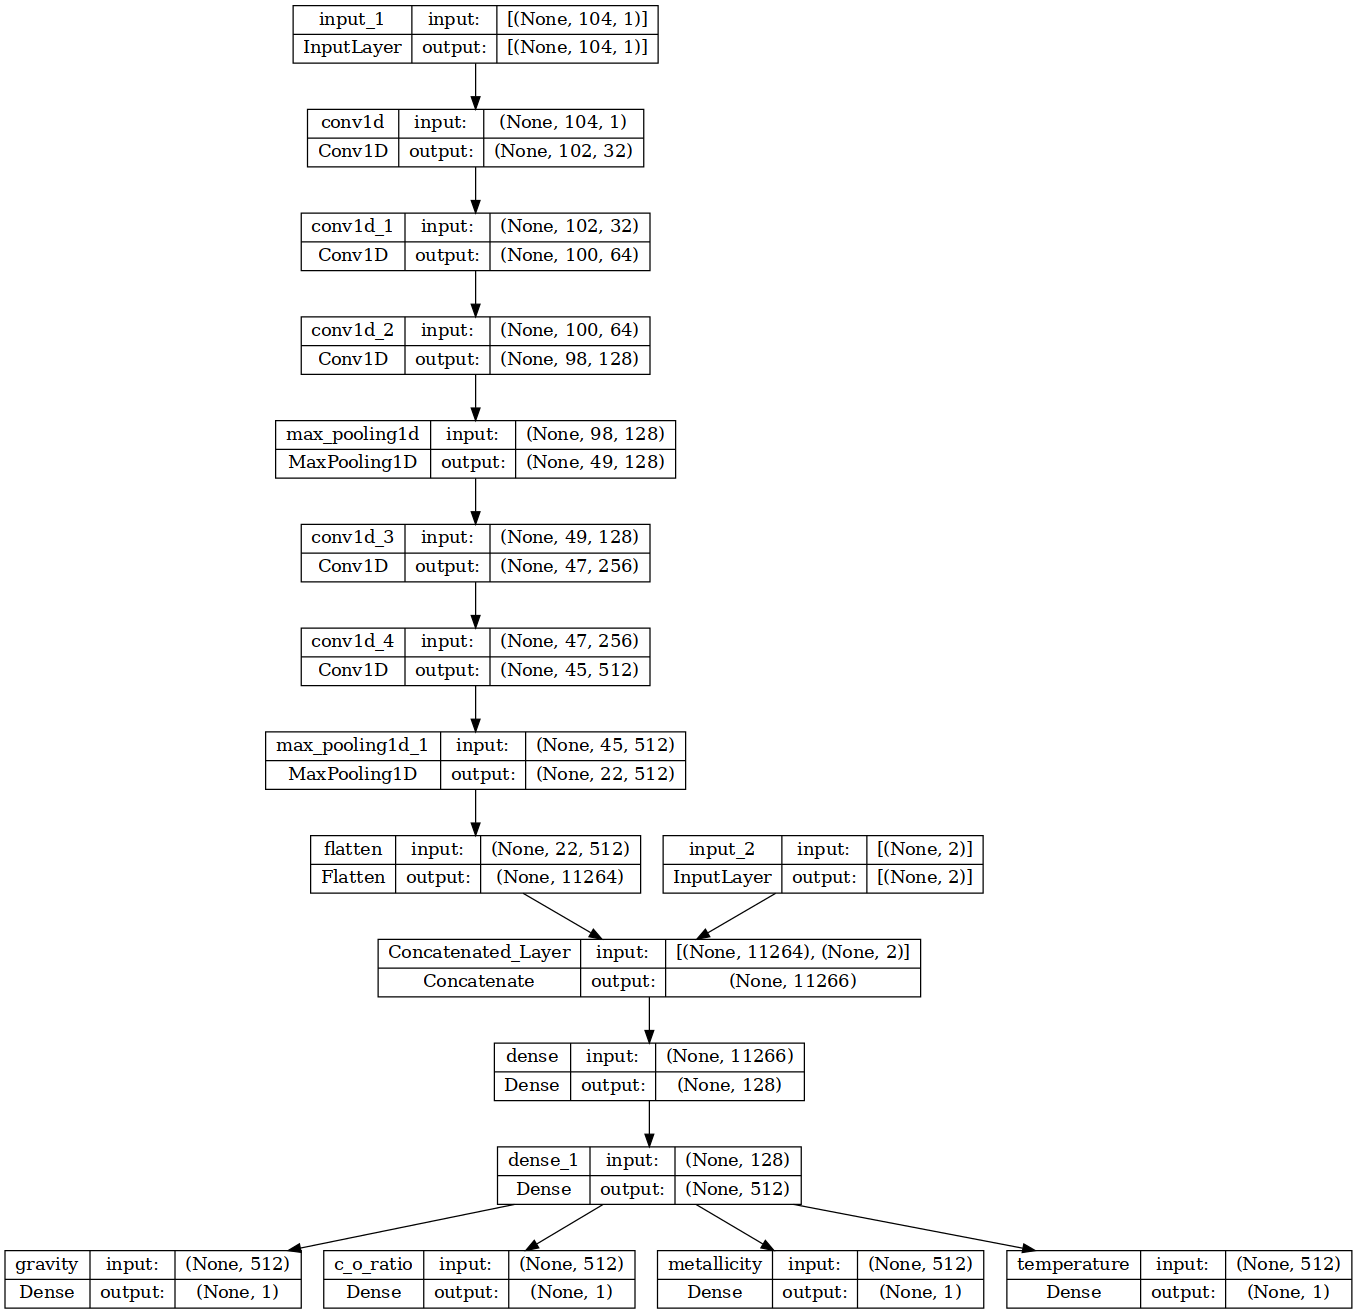

In [33]:
tf.keras.utils.plot_model(
                train_cnn_regression.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
                show_layer_activations=False,
)

In [34]:
train_cnn_regression.trained_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 104, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 102, 32)      128         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 100, 64)      6208        ['conv1d[0][0]']                 
                                                                                                  
 conv1d_2 (Conv1D)              (None, 98, 128)      24704       ['conv1d_1[0][0]']               
                                                                                              

In [35]:
train_cnn_regression.plot_model_loss(title = 'X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### Plot Y predicted vs Y_Actual: Histogram & Scatter plot

6/6 [==============================] - 1s 188ms/step


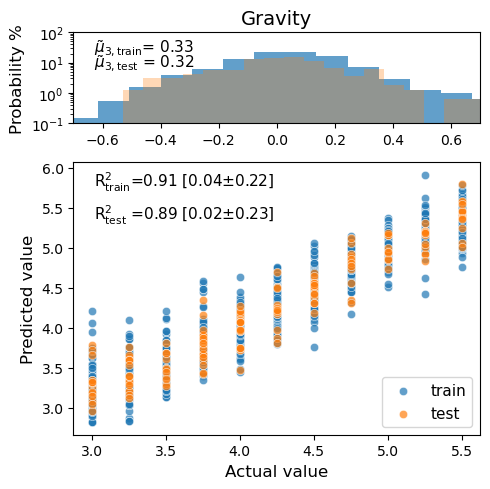

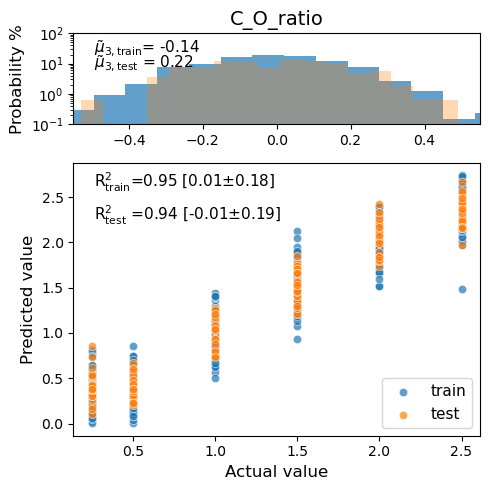

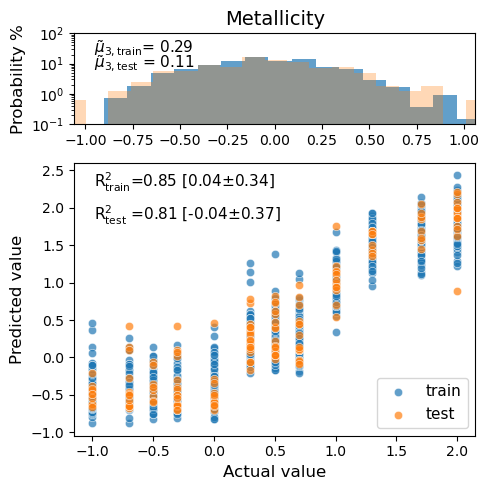

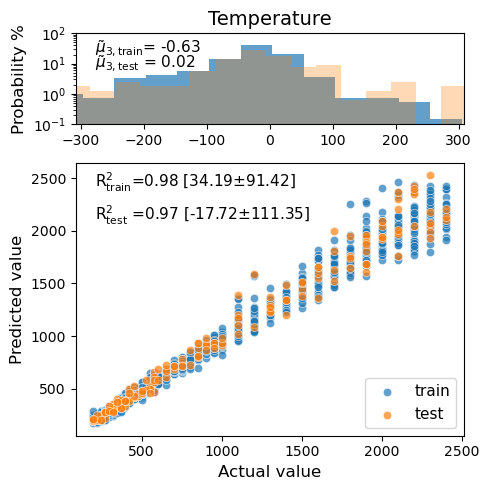

In [36]:
i = 19
regression_report(
        trained_model = train_cnn_regression,
    
        Xtrain = [train_cnn_regression.X_train_standardized_rowwise[::i],
                  train_cnn_regression.X_train_standardized_columnwise[::i]],
    
        Xtest  = [train_cnn_regression.X_test_standardized_rowwise[::i], 
                  train_cnn_regression.X_test_standardized_columnwise[::i]],
    
        ytrain = train_cnn_regression.y_train_standardized_columnwise[::i],
    
        ytest  = train_cnn_regression.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
        print_results = False,        
                 )